In [ ]:
# Importujemy biblioteki do analizy danych i uczenia maszynowego
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Praca z danymi

In [ ]:
# Wczytujemy zbiór danych
data = pd.read_csv('https://raw.githubusercontent.com/Francho03/AI-Project/refs/heads/main/data/data.csv')
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27119,13596,127041,Female,disloyal Customer,23,Business travel,Eco,651,5,5,...,3,4,5,5,4,4,3,0,0.0,satisfied
27876,13975,103512,Male,Loyal Customer,59,Business travel,Business,3854,2,2,...,5,5,5,5,1,5,1,2,0.0,satisfied
78375,52644,20970,Male,Loyal Customer,52,Personal Travel,Eco,689,3,4,...,1,2,1,3,4,3,1,0,0.0,neutral or dissatisfied
23303,11682,98043,Male,disloyal Customer,30,Business travel,Business,1797,0,0,...,4,4,3,5,5,4,4,4,17.0,satisfied
109284,83637,36618,Female,Loyal Customer,36,Business travel,Business,785,1,1,...,2,2,2,2,2,2,4,0,1.0,satisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lp                                 129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      1294

In [ ]:
# Sprawdzamy brakujące wartości
pd.isnull(data).sum()

,0
lp,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# Kodujemy zmienne kategoryczne na wartości liczbowe
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])
data['satisfaction'] = le.fit_transform(data['satisfaction'])

In [ ]:
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
93208,67515,112024,1,0,48,0,1,680,1,1,...,1,2,3,3,1,3,1,6,7.0,0
45576,22854,61076,0,1,21,0,1,1506,2,1,...,4,5,3,4,3,5,4,0,0.0,0
4661,2336,11800,1,0,63,0,2,395,2,2,...,2,1,2,4,4,4,2,0,2.0,0
33661,16877,88076,1,0,50,0,0,1677,5,5,...,4,4,4,4,3,4,4,0,0.0,1
94283,68595,4883,0,0,57,1,1,408,4,4,...,4,4,4,4,3,4,3,0,0.0,1


# Statystyki opisowe

In [ ]:
# Tworzymy podstawowe statystyki opisowe, dodajemy modę (dominantę) oraz wariancję
summary = data.describe()
summary.loc['mode'] = data.mode().iloc[0]
summary.loc['variance'] = data.var()
display(summary)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,1.294870e+05,1.294870e+05,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,4.415897e+04,6.495834e+04,0.492590,0.183138,39.428761,0.309236,0.593704,1190.210662,2.728544,3.057349,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,3.120953e+04,3.748978e+04,0.499947,0.386781,15.117597,0.462180,0.621371,997.560954,1.329235,1.526787,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,0.000000e+00,1.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.623000e+04,3.249450e+04,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,3.896600e+04,6.497200e+04,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,7.144050e+04,9.741550e+04,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.039030e+05,1.298800e+05,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000
mode,0.000000e+00,1.000000e+00,0.000000,0.000000,39.000000,0.000000,0.000000,337.000000,2.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000
variance,9.740345e+08,1.405484e+09,0.249947,0.149600,228.541731,0.213611,0.386102,995127.857371,1.766865,2.331079,...,1.779955,1.656452,1.732203,1.392594,1.603126,1.384420,1.725608,1438.902365,1479.606248,0.245712


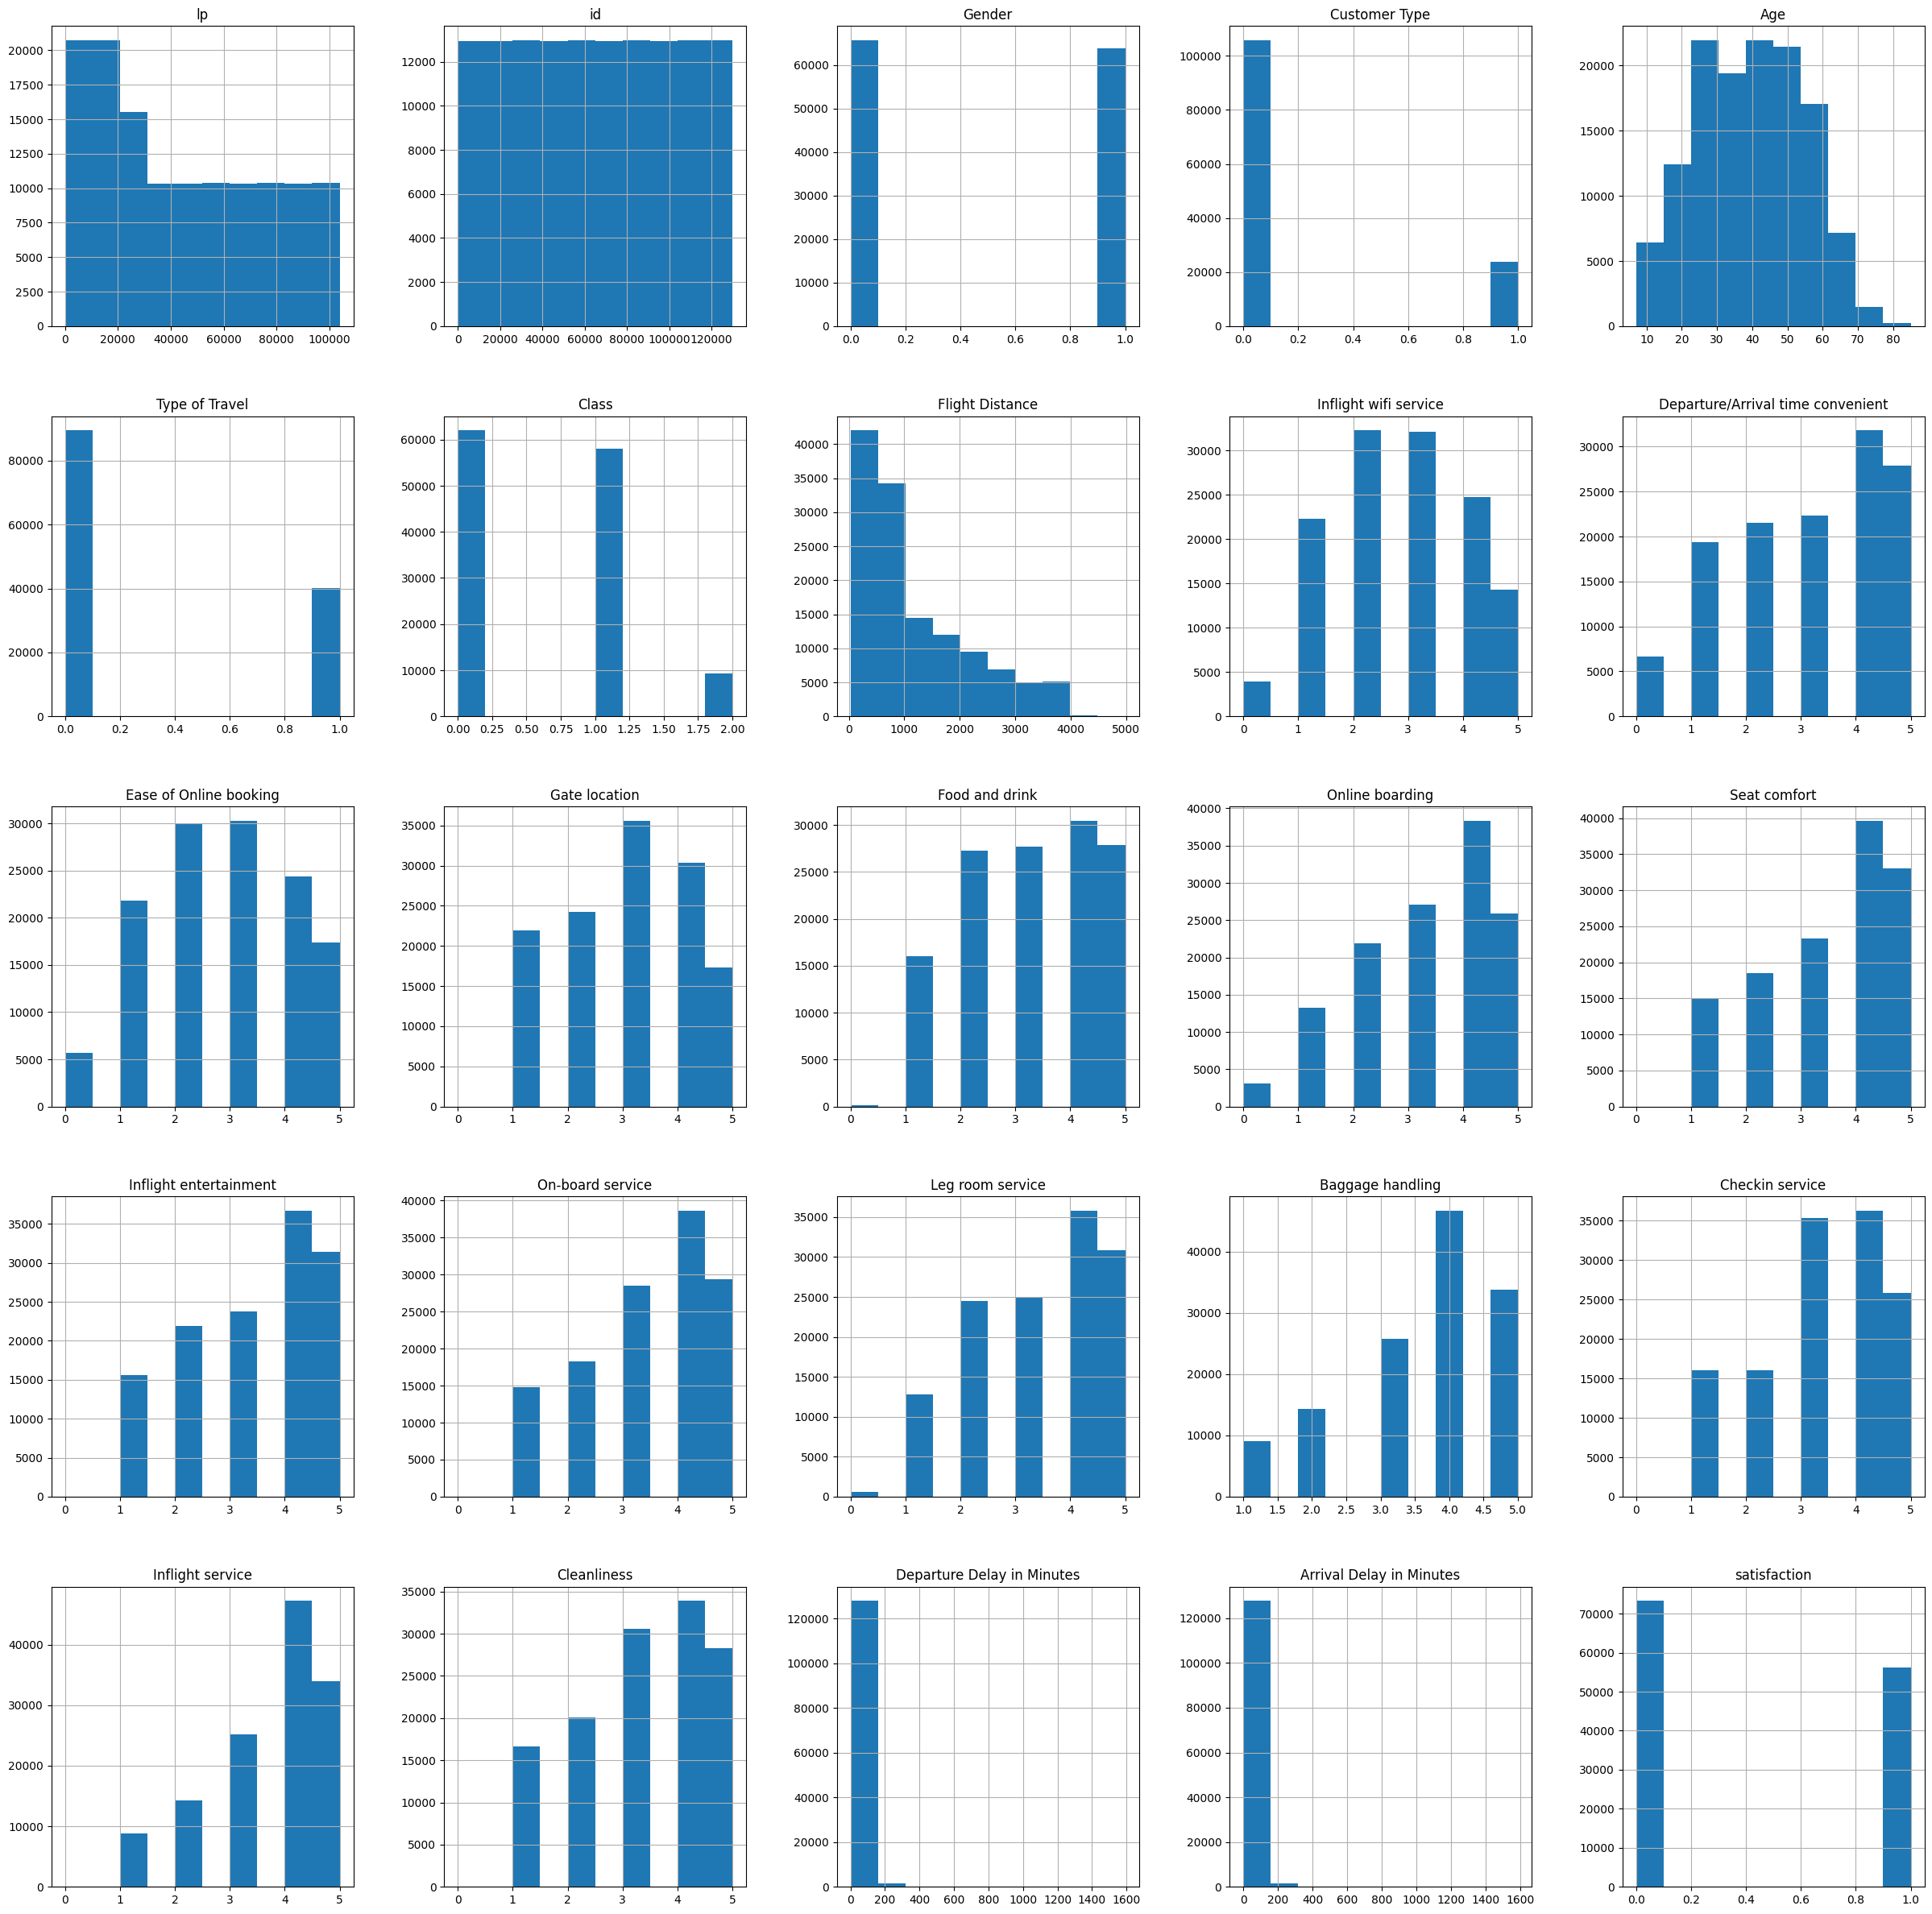

In [ ]:
# Prezentujemy histogramy
data.hist(figsize = (30, 30))
plt.savefig('hist_data.png')
plt.show()

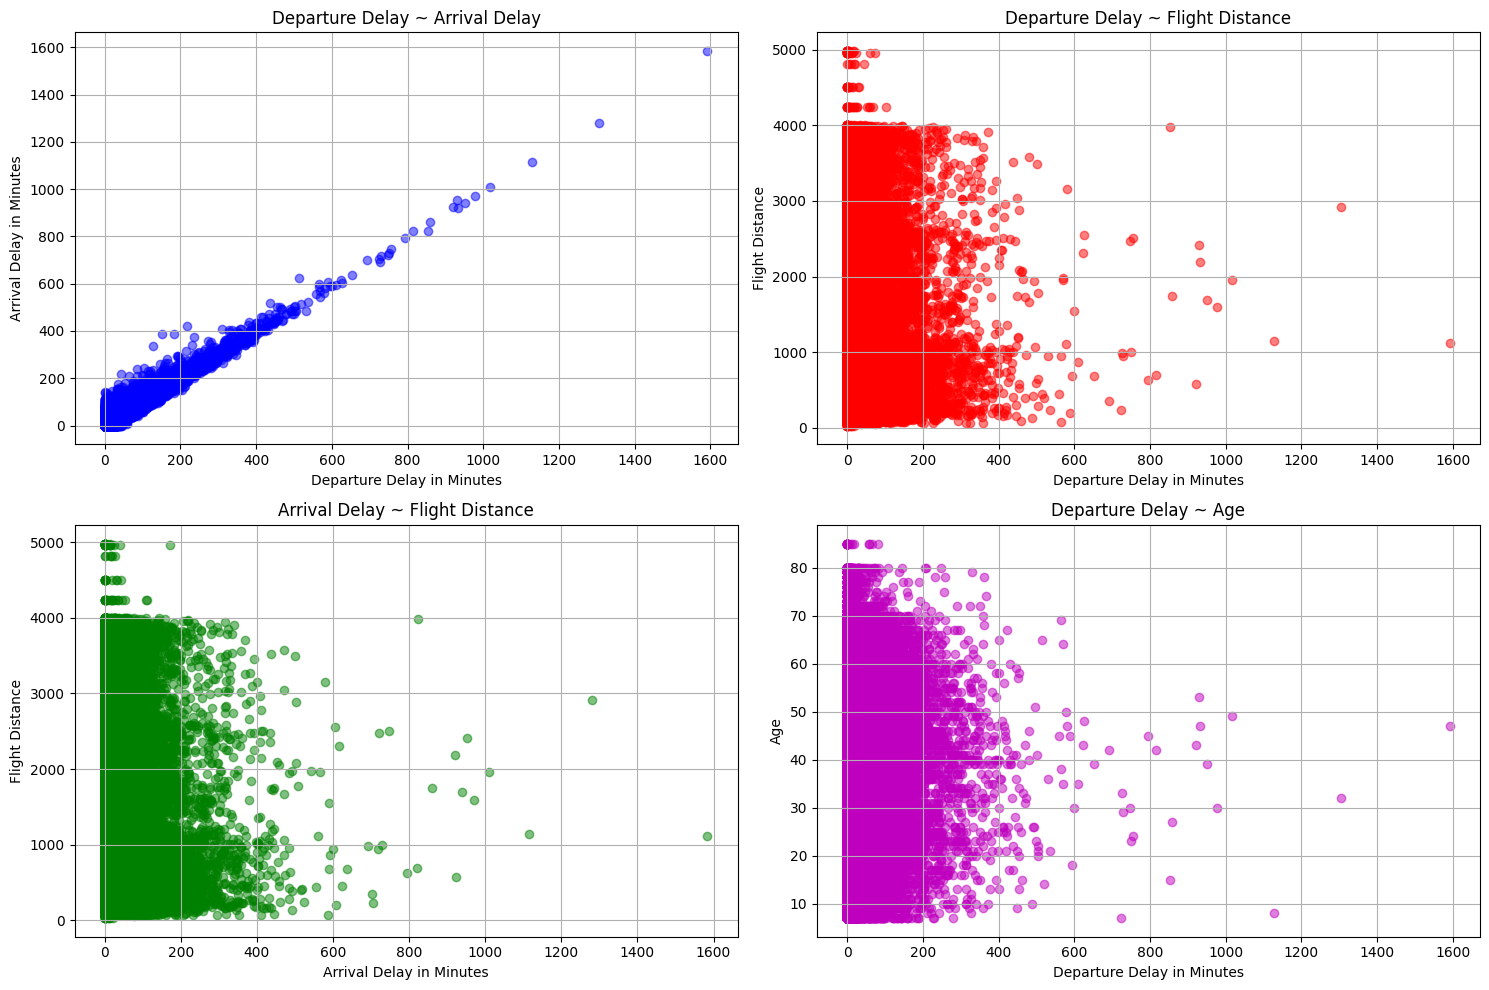

In [ ]:
# Tworzymy wykresy rozrzutu dla zależności między poszczególnymi zmiennymi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].scatter(data['Departure Delay in Minutes'], data['Arrival Delay in Minutes'], alpha=0.5, color='b')
axes[0, 0].set_xlabel('Departure Delay in Minutes')
axes[0, 0].set_ylabel('Arrival Delay in Minutes')
axes[0, 0].set_title('Departure Delay ~ Arrival Delay')
axes[0, 0].grid(True)

axes[0, 1].scatter(data['Departure Delay in Minutes'], data['Flight Distance'], alpha=0.5, color='r')
axes[0, 1].set_xlabel('Departure Delay in Minutes')
axes[0, 1].set_ylabel('Flight Distance')
axes[0, 1].set_title('Departure Delay ~ Flight Distance')
axes[0, 1].grid(True)

axes[1, 0].scatter(data['Arrival Delay in Minutes'], data['Flight Distance'], alpha=0.5, color='g')
axes[1, 0].set_xlabel('Arrival Delay in Minutes')
axes[1, 0].set_ylabel('Flight Distance')
axes[1, 0].set_title('Arrival Delay ~ Flight Distance')
axes[1, 0].grid(True)

axes[1, 1].scatter(data['Departure Delay in Minutes'], data['Age'], alpha=0.5, color='m')
axes[1, 1].set_xlabel('Departure Delay in Minutes')
axes[1, 1].set_ylabel('Age')
axes[1, 1].set_title('Departure Delay ~ Age')
axes[1, 1].grid(True)

plt.tight_layout()
plt.savefig('scatter_data.png')
plt.show()

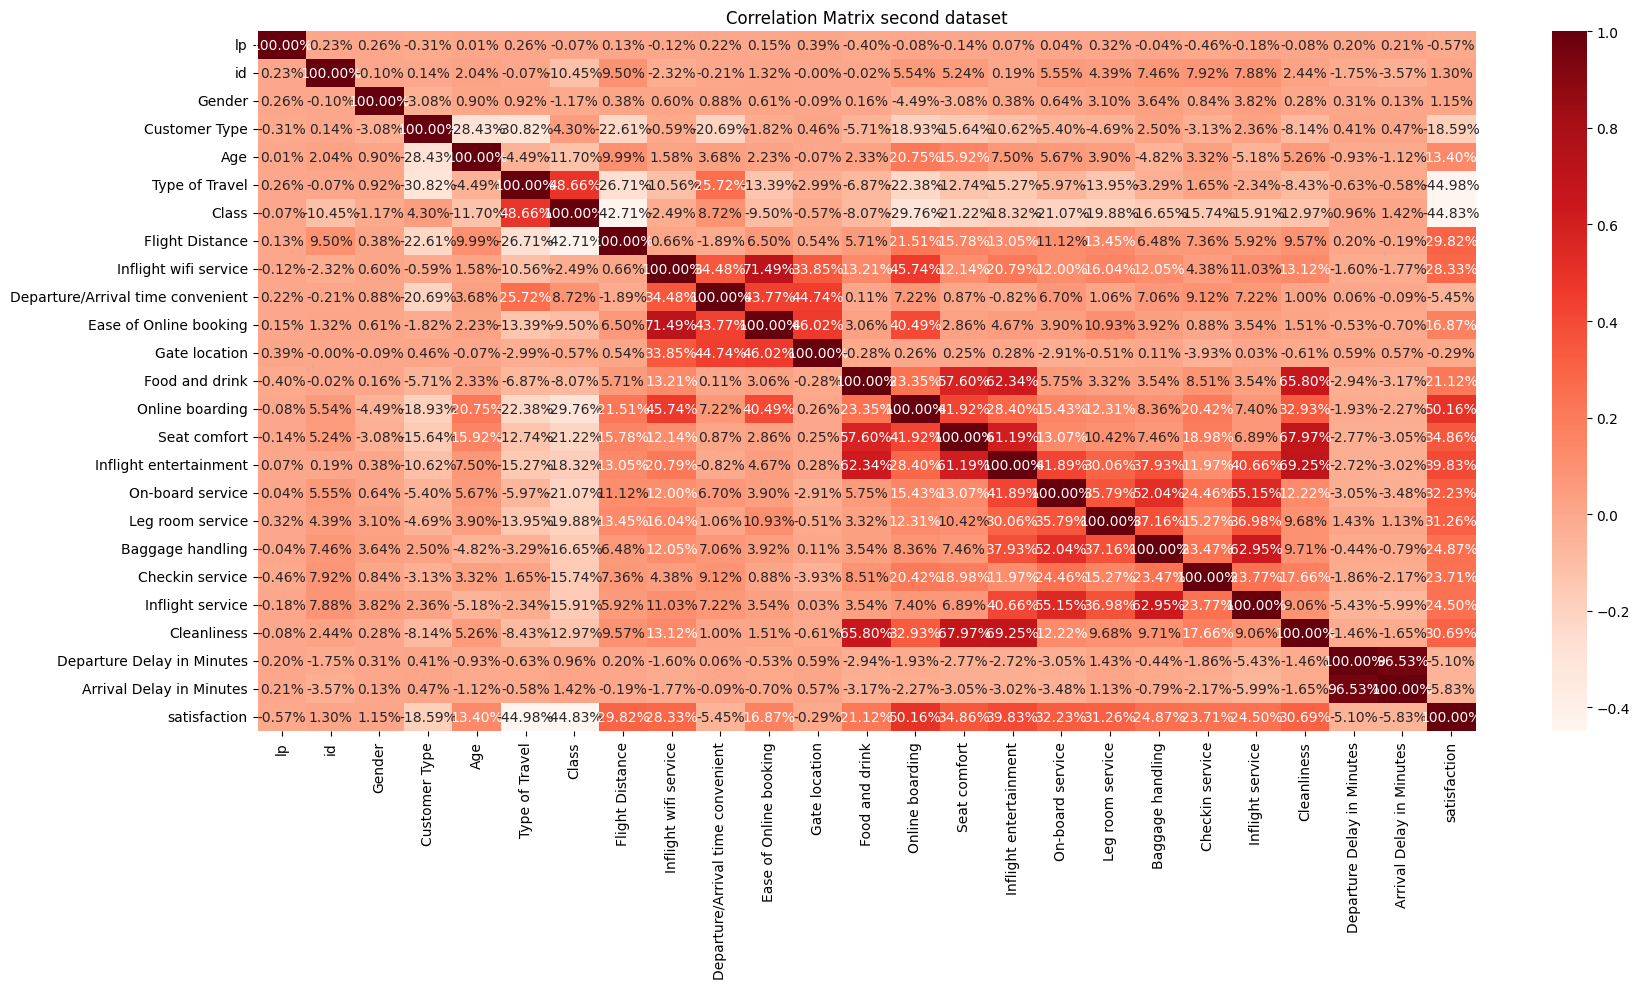

In [ ]:
# Tworzymy wykres z macierzą korelacji
corrmatrix = data.corr()
plt.figure(figsize = (18,10))
heatmap(corrmatrix, cmap = 'Reds', annot = True, fmt = '.2%')
plt.title('Correlation Matrix second dataset')
plt.tight_layout()
plt.savefig('corr_matrix.png')
plt.show()

# Drzewo decyzyjne

In [ ]:
# Oddzielamy zmienne wejściowe (x) od zmiennej docelowej (y - satysfakcja)
x = data.drop('satisfaction', axis=1)
y = data.satisfaction

In [ ]:
# Dzielimy dane na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Tworzymy instancję modelu drzewa decyzyjnego
model = DecisionTreeClassifier()

In [ ]:
# Trenujemy model
model = model.fit(x_train, y_train)

In [ ]:
# Oceniamy dokładność modelu
model.score(x_train, y_train)

1.0

In [ ]:
# Oceniamy dokładność modelu na zbiorze testowym
model.score(x_test, y_test)

0.9465209668700286

In [ ]:
# Sprawdzamy parametry modelu
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Zmieniamy minimalną liczbę próbek
model.min_samples_split = 200

# Wyświetlamy zaktualizowane parametry modelu
model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 200,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Ponawiamy procedurę
model = model.fit(x_train, y_train)

In [ ]:
model.score(x_train, y_train)

0.9561536456573574

In [ ]:
model.score(x_test, y_test)

0.9496486215151749

In [ ]:
# Dokonujemy predykcji na zbiorze testowym
y_test_pred = model.predict(x_test)

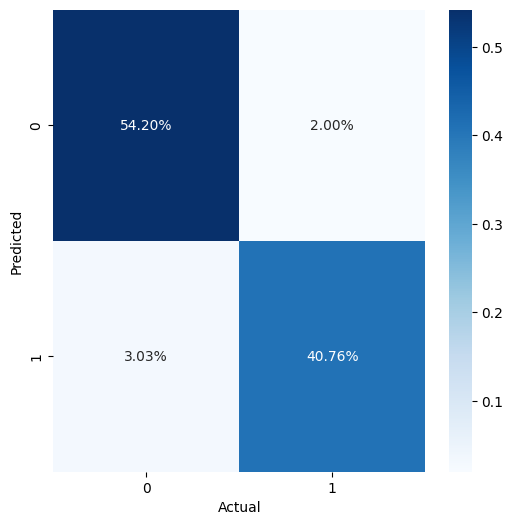

In [ ]:
# Obliczamy macierz pomyłek
cm = confusion_matrix(y_test, y_test_pred)

# Tworzymy heatmapę macierzy
plt.figure(figsize = (6, 6))
heatmap(cm / sum(sum(cm)), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Actual')  # Etykieta osi X, oznaczająca rzeczywiste etykiety (prawdziwe klasy)
plt.ylabel('Predicted')  # Etykieta osi Y, oznaczająca przewidywane etykiety (przewidywania modelu)
plt.savefig('confusion_matrix.png')
plt.show()


In [ ]:
# Sprawdzamy ważność cech w modelu
model.feature_importances_

array([1.27062498e-03, 1.33313454e-02, 1.49993530e-04, 4.47972835e-02,
       7.03936211e-03, 1.66094740e-01, 2.07787638e-02, 1.21289450e-03,
       1.94907803e-01, 1.87489756e-04, 8.40051533e-04, 1.22540610e-02,
       9.45575303e-04, 4.08959572e-01, 1.15363559e-02, 5.06184517e-02,
       3.47252876e-03, 4.91676424e-03, 1.05409124e-02, 2.68181506e-02,
       7.64278799e-03, 9.32898746e-03, 3.18979747e-04, 2.03652045e-03])

In [ ]:
# Tworzymy tabelę z cechami i ich ważnością
importance_table = pd.DataFrame({
    'Variable': x.columns,
    'Importance': model.feature_importances_
})

importance_table = importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importance_table
# Zdecydowanie wyróżniają się pierwsze trzy cechy - konieczne do zinterpretowania

,Variable,Importance
0,Online boarding,0.408960
1,Inflight wifi service,0.194908
2,Type of Travel,0.166095
3,Inflight entertainment,0.050618
4,Customer Type,0.044797
5,Checkin service,0.026818
6,Class,0.020779
7,id,0.013331
8,Gate location,0.012254
9,Seat comfort,0.011536


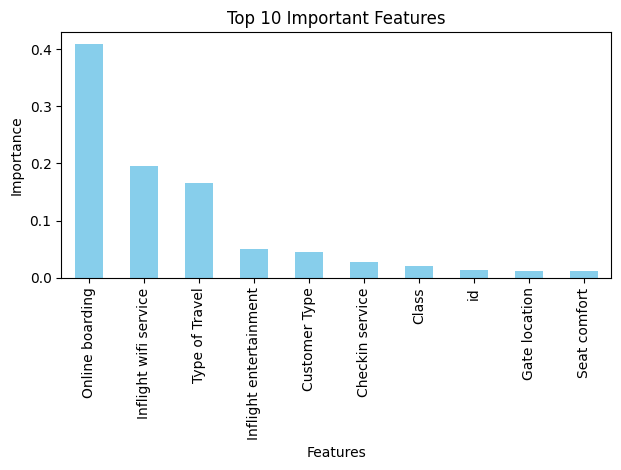

In [ ]:
# Rysujemy wykres słupkowy dla najważniejszych cech
importance_table.head(10).plot(kind='bar', x='Variable', y='Importance', legend=False, color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig('importance.png')
plt.show()

In [ ]:
# Wyświetlamy klasy, które model rozróżnia
model.classes_

array([0, 1])

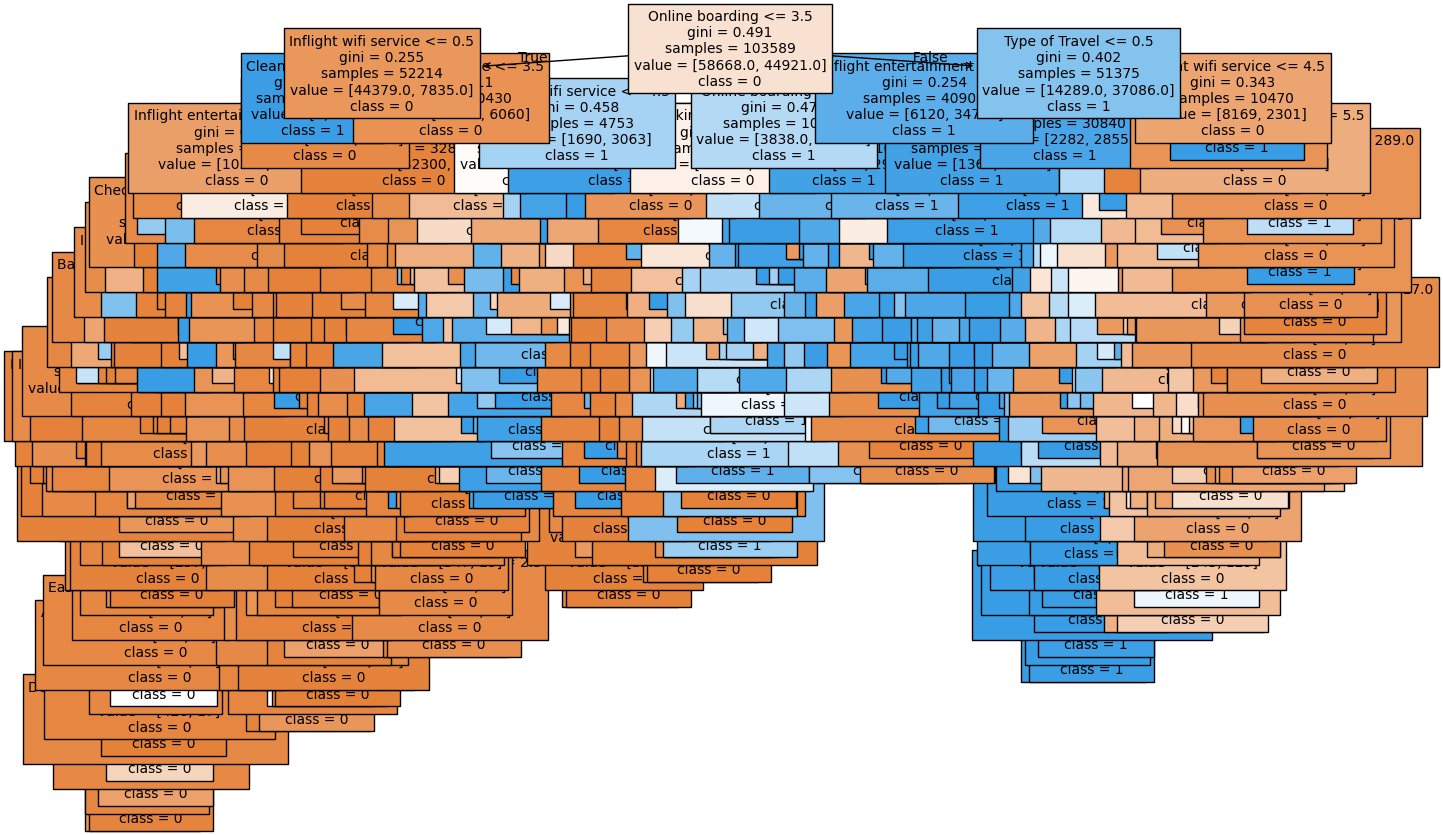

In [ ]:
# Tworzymy wykres drzewa decyzyjnego
fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.savefig('decision_tree.png')
plt.show()

## Minimal cost complexity pruning

In [ ]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

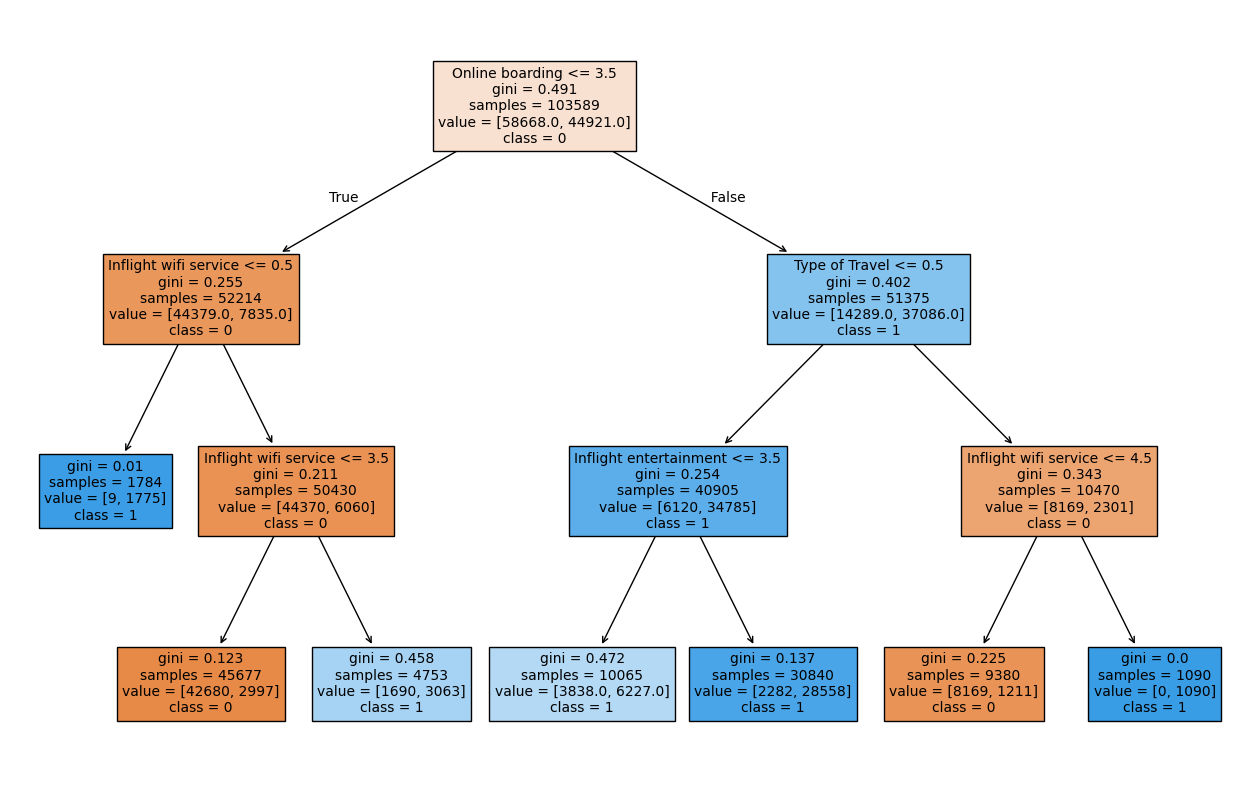

In [ ]:
# Tworzymy model z parametrem przycinania
model.ccp_alpha = 0.01

model.fit(x_train, y_train)

fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.savefig('decision_tree_ccp.png')
plt.show()

# Algorytm centroidów (K-means clustering)

In [ ]:
# Ponownie tworzymy zbiór data dla powrotu do zmiennych numerycznych oraz kategorycznych
data = pd.read_csv('https://raw.githubusercontent.com/Francho03/AI-Project/refs/heads/main/data/data.csv')

In [ ]:
df = data.drop('Age', axis=1)

In [ ]:
# Wybieramy kolumny numeryczne
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]

In [ ]:
# Standaryzujemy cechy
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Wyznaczamy optymalną liczbę klastrów metodą "łokcia"
K = range(2, 11)
inertias = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [ ]:
# Obliczamy Silhouette Score dla próbki danych
# (dla przyspieszenia obliczeń, dla całego zbioru zajmowało zbyt dużo czasu)
silhouette_scores = []
X_sampled = resample(X_scaled, n_samples=1000, random_state=42)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sampled)
    silhouette_scores.append(silhouette_score(X_sampled, kmeans.labels_))

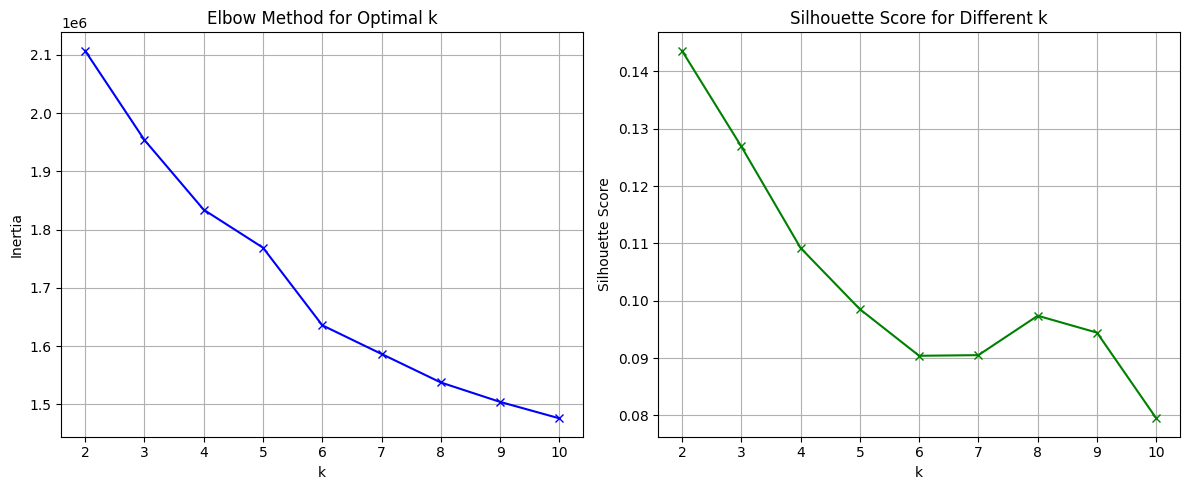

In [ ]:
# Kreślimy wykres bezwładności (elbow curve) oraz wyniku profilu (silhouette score)
plt.figure(figsize=(12, 5))

# Elbow Method (Inertia)
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.grid(True)

plt.tight_layout()
plt.savefig('optimal_clusters.png')
plt.show()

In [ ]:
# Inicjalizujemy model KMeans z wybraną liczbą klastrów
optimal_k = 3 # z wykresów wynika, że optymalną liczbą jest 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Analizujemy klastry
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print("\nCluster Summary (Numerical Features):")
print(cluster_summary)


Cluster Summary (Numerical Features):
                   lp            id  Flight Distance  Inflight wifi service  \
Cluster                                                                       
0        44265.782836  62951.955587       981.693453               2.322573   
1        44096.401567  65592.105909      1238.359774               1.923024   
2        44093.522575  66696.285300      1387.463364               3.956813   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 2.996745                2.591896   
1                                 2.194341                1.710721   
2                                 3.938010                3.930561   

         Gate location  Food and drink  Online boarding  Seat comfort  \
Cluster                                                                 
0             2.985127        2.220048         2.601269      2.38495

In [ ]:
# Analizujemy częstotliwości dla kolumn kategorycznych w klastrach
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Features Distribution in Clusters:")
for col in categorical_columns:
    print(f"\n{col} distribution in clusters:")
    cluster_distribution = df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    print(cluster_distribution)


Categorical Features Distribution in Clusters:

Gender distribution in clusters:
Gender   Female   Male
Cluster               
0         24777  23767
1         19732  19462
2         21194  20555

Customer Type distribution in clusters:
Customer Type  Loyal Customer  disloyal Customer
Cluster                                         
0                       37371              11173
1                       32000               7194
2                       36402               5347

Type of Travel distribution in clusters:
Type of Travel  Business travel  Personal Travel
Cluster                                         
0                         29192            19352
1                         27546            11648
2                         32707             9042

Class distribution in clusters:
Class    Business    Eco  Eco Plus
Cluster                           
0           15319  28631      4594
1           20645  16096      2453
2           26026  13390      2333

satisfaction distribu

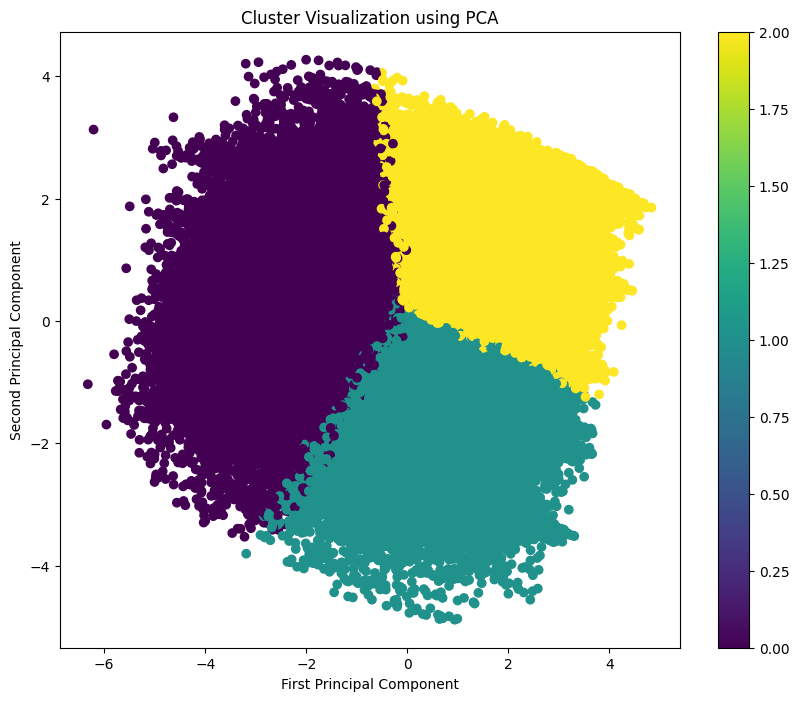

In [ ]:
# Wizualizujemy klastry
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization using PCA')
plt.colorbar(scatter)
plt.savefig('clusters_final.png')
plt.show()

In [ ]:
# Przywracamy centroidy do oryginalnej skali (względem oryginalnych danych)
feature_importance = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_columns
)
print("\nCluster Centers (Feature Importance):")
print(feature_importance)


Cluster Centers (Feature Importance):
             lp            id  Flight Distance  Inflight wifi service  \
0  44272.577871  62955.295505       981.813019               2.321946   
1  44090.714318  65587.650859      1237.871271               1.924991   
2  44090.886917  66698.853803      1388.049084               3.957726   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                           2.995881                2.590886       2.984658   
1                           2.195732                1.713171       2.147468   
2                           3.939262                3.931469       3.747962   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0        2.220527         2.601203      2.385495                2.030683   
1        3.899495         3.153256      4.108460                4.203483   
2        3.697199         4.104906      4.044144                4.108599   

   On-board service  Leg room service  Baggage

In [ ]:
# Zapisujemy dane klastrowane
df.to_csv('clustered_data.csv', index=False)